<a href="https://colab.research.google.com/github/Waodefahmiramadhani/145_Wa-Ode-Fahmi-Ramadhani/blob/main/145_Fahmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
cardekho = pd.read_csv('/content/breast-cancer-wisconsin-data_data.csv')

In [ ]:
cardekho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
cardekho.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
cardekho.drop('id',axis=1, inplace=True)

In [5]:
#memisakhan atribut dengan label dimana x itu atribut dan y itu label
X = cardekho[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']]
y = cardekho['diagnosis']


#membagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.1, random_state=123)


In [6]:
from sklearn.tree import DecisionTreeClassifier

#menentukan  model decision tree
tree_model= DecisionTreeClassifier()

#melatih model menggunakan data latih dengan fungsi fit
tree_model= tree_model.fit(X_train,y_train)

In [7]:
#evaluasi model untuk meguji seberapa baik model yang digunakan dan akurasi

from sklearn.metrics import accuracy_score

y_pred =  tree_model.predict(X_test)

accuracy_score =round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ',accuracy_score)

Accuracy:  0.947


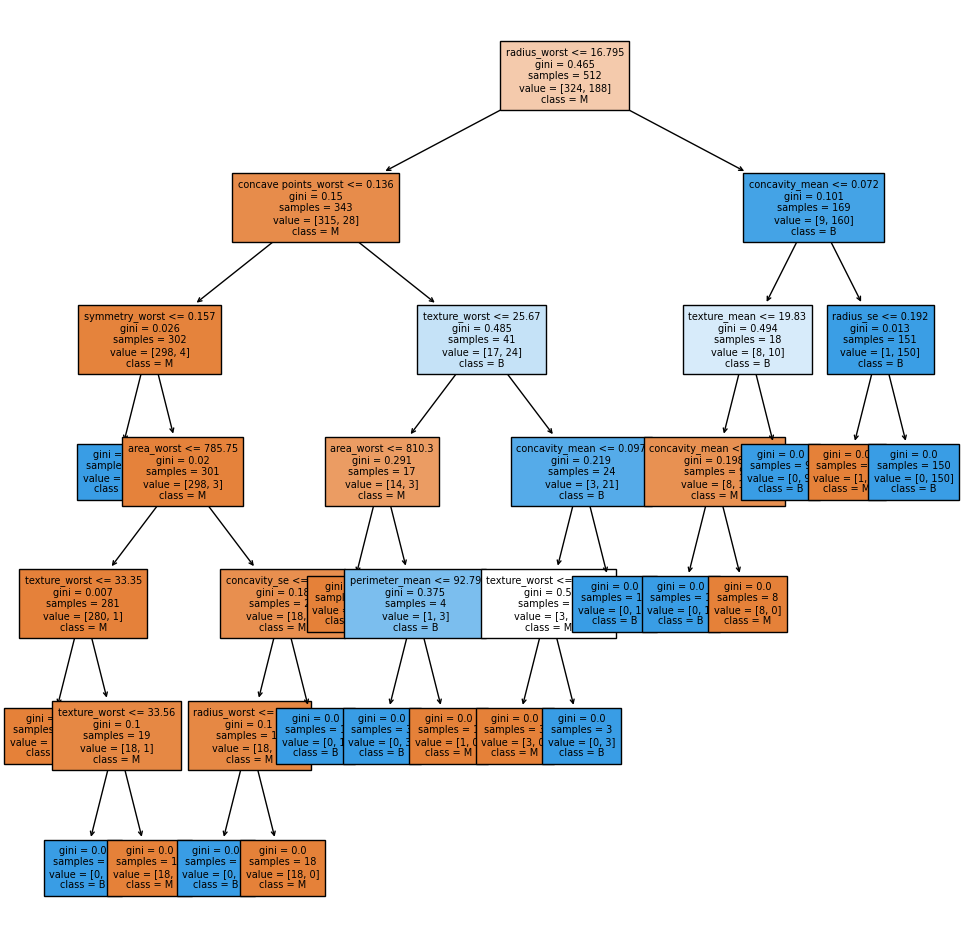

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualisasi pohon keputusan
plt.figure(figsize=(12, 12))
plot_tree(tree_model, feature_names=X.columns, class_names=cardekho['diagnosis'].unique(), filled=True, fontsize=7)
plt.show()
